<h3><center>Data Transformation and Mapping </center></h3>



<h4><center>Rija Shrestha</center></h4>
<h4><center>Presidential Graduate School, Kathmandu </center></h4>
<h4><center>PRG 330: Python Programming with Data </center></h4>
<h4><center> Prof. Tek Raj Pant </center></h4>
<h4><center> November 17, 2024</center></h4>

# **Data Transformation and Mapping**
* **Apply:** allows us to apply a function to each element row, or column in a DataFrame or Series
* **Map:** is used to map values in a Series according to a dictionary or another Series
* **Replace:** replace allows for replacing specific values in the DataFrame with new value
* **astype:** this is used to convert data type 
* **pipe:** it allows chaining and using complex functions that operate on the entire DataFrame. This can be used for complex transformation operation

### a. Apply

In [1]:
# convert marks to scale of 1

import pandas as pd
students = pd.read_csv('data/student.csv')
students['mark percent'] = students['mark'].apply(lambda m: m/100)
students.head()

,id,name,class,mark,gender,mark percent
0,1,John Deo,Four,75,female,0.75
1,2,Max Ruin,Three,85,male,0.85
2,3,Arnold,Three,55,male,0.55
3,4,Krish Star,Four,60,female,0.60
4,5,John Mike,Four,60,female,0.60


### b. map (mapping one data with another)

In [2]:
students['grade'] = students['class'].map({'One':1,'Two':2,'Three':3,'Four':4, 'Five':5,'Six':6,'Seven':7,'Eight':8, 'Nine':9, 'Ten':10})
students['gender_code'] = students['gender'].map({'male':1,'female':2})
students.head()

,id,name,class,mark,gender,mark percent,grade,gender_code
0,1,John Deo,Four,75,female,0.75,4.0,2
1,2,Max Ruin,Three,85,male,0.85,3.0,1
2,3,Arnold,Three,55,male,0.55,3.0,1
3,4,Krish Star,Four,60,female,0.60,4.0,2
4,5,John Mike,Four,60,female,0.60,4.0,2


### c. replace (replaces only perticular data)

In [18]:
# Replace specific values in the 'class' column
students['class'] = students ['class'].replace ({'four': '4th', 'ten':'10th'})

# replace name 'John Doe' with 'JaiRam'(replace specific value)
students ['name'] = students['name'].replace ({'John Deo' : 'JaiRam'})
students.head()

,id,name,class,mark,gender
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
5,6,Alex John,Four,55.0,male
6,7,My John Rob,Fifth,78.0,male
7,8,Asruid,Five,85.0,male


### d. astype (changes data type)

In [ ]:
# Convert 'mark' column to int

students['mark'] = students['mark'].astype(int)
students.head()

,id,name,class,mark,gender,mark percent,grade,gender_code
0,1,John Deo,Four,75,female,0.75,4.0,2
1,2,Max Ruin,Three,85,male,0.85,3.0,1
2,3,Arnold,Three,55,male,0.55,3.0,1
3,4,Krish Star,Four,60,female,0.60,4.0,2
4,5,John Mike,Four,60,female,0.60,4.0,2


In [7]:
# Convert 'mark' column to float (decimal)

students['mark'] = students['mark'].astype(float)
students.head()

,id,name,class,mark,gender,mark percent,grade,gender_code
0,1,John Deo,Four,75.0,female,0.75,4.0,2
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1
2,3,Arnold,Three,55.0,male,0.55,3.0,1
3,4,Krish Star,Four,60.0,female,0.60,4.0,2
4,5,John Mike,Four,60.0,female,0.60,4.0,2


### e. pipe

In [9]:
# create a function that triples marks and pipes it to the pandas DataFrame

def triple_marks(df):
    df ['mark']= df['mark'] * 3
    return df


In [12]:
def check_result(df):
    df['result'] = df['mark'].apply(lambda m : 'Pass' if m>40 else 'Fail')
    return df

students = students.pipe(check_result)
students.head()


,id,name,class,mark,gender,mark percent,grade,gender_code,result
0,1,John Deo,Four,75.0,female,0.75,4.0,2,Pass
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1,Pass
2,3,Arnold,Three,55.0,male,0.55,3.0,1,Pass
3,4,Krish Star,Four,60.0,female,0.60,4.0,2,Pass
4,5,John Mike,Four,60.0,female,0.60,4.0,2,Pass


# **Data Cleaning and Manipulation**
* Handle Missing Data
* Handle Duplicate
* One-Hot-Encoding
* Normalization

### a. Handle Missing Data
* Remove Rows Containing Missing Values (df.dropna())
  * **dropna(axis=0)** removes rows containing at least one missing value 
  * **(dropna(axis=1))** Removes columns containing at least one missing value

* Replace Missing Values (df.fillna())
  * **Replace with specific value:**  (df. fillna(value)) *fill the missing values with the previous row value of column value (if axis=1)*
  * **Backward Fill, Forward Fill:**  (df.fillna(value,method='bfill")) (df.fillna(value.method='ffill')) 
  * **Fill individual column with specified value:**  (df.fillna({'height':150, 'weight':60}))
  * **Fill with average, Interpretation etc.**

In [17]:
from IPython.display import display 

students=pd.read_csv('data/student.csv')
display(students.head())
students.dropna(axis=0,how='any',inplace=True) #a(axis=0 default) drop rows with 

students = students.fillna(1)  #replace missing values with 1
display(students.head())

students.fillna(method='ffill')   #fil with previous row value
students.fillna(method='bfill')    # fill with next row
students['mark'].fillna(50)    # only fill empty value of Name column 
students.fillna({'mark' : 50, 'gender' : 'Male'})   #replace mark with 50 if its empty 
df_interpolated = students.interpolate()
students.fillna(df_interpolated)
students['mark'].fillna(students['mark'].mean())

,id,name,class,mark,gender
0,1,John Deo,Four,NaN,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,NaN
4,5,John Mike,Four,60.0,NaN


,id,name,class,mark,gender
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
5,6,Alex John,Four,55.0,male
6,7,My John Rob,Fifth,78.0,male
7,8,Asruid,Five,85.0,male


C:\Users\rizas\AppData\Local\Temp\ipykernel_9828\4092166811.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method='ffill')   #fil with previous row value
C:\Users\rizas\AppData\Local\Temp\ipykernel_9828\4092166811.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method='bfill')    # fill with next row
C:\Users\rizas\AppData\Local\Temp\ipykernel_9828\4092166811.py:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = students.interpolate()


1     85.0
2     55.0
5     55.0
6     78.0
7     85.0
8     78.0
9     55.0
10    89.0
11    94.0
12    88.0
13    88.0
14    88.0
15    88.0
16    54.0
17    75.0
18    18.0
19    65.0
20    69.0
21    55.0
22    79.0
23    78.0
24    88.0
25    79.0
26    81.0
27    86.0
28    55.0
29    79.0
30    88.0
31    90.0
32    96.0
33    69.0
34    88.0
Name: mark, dtype: float64

### b. Handle Duplicate Data
* Check Duplicates
* Drop Duplicates

In [15]:
duplicates = students.duplicated()    # check duplicate
students.drop_duplicates()       # drop duplicate duplicates
duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

### c. One.hot encoding (jun position ma number xa teslai 1 lekhney otherwise, 0)

In [16]:
students = pd.read_csv('data/student.csv')
df_pandas_encoded = pd.get_dummies(students, columns=['class'])
print(f"One-Hot Encoded Data using Pandas:\n")
display(df_pandas_encoded)

One-Hot Encoded Data using Pandas:



,id,name,mark,gender,class_Eight,class_Fifth,class_Five,class_Four,class_Nine,class_Seven,class_Six,class_Three
0,1,John Deo,NaN,female,False,False,False,True,False,False,False,False
1,2,Max Ruin,85.0,male,False,False,False,False,False,False,False,True
2,3,Arnold,55.0,male,False,False,False,False,False,False,False,True
3,4,Krish Star,60.0,NaN,False,False,False,True,False,False,False,False
4,5,John Mike,60.0,NaN,False,False,False,True,False,False,False,False
5,6,Alex John,55.0,male,False,False,False,True,False,False,False,False
6,7,My John Rob,78.0,male,False,True,False,False,False,False,False,False
7,8,Asruid,85.0,male,False,False,True,False,False,False,False,False
8,9,Tes Qry,78.0,male,False,False,False,False,False,False,True,False
9,10,Big John,55.0,female,False,False,False,True,False,False,False,False


### **d. Data Normalization**
Data normalization involves adjusting measurement values of different scales to a common scale. Normalization is only applicable to numerical columns.

There are five common normalization methods:
1. Single feature scaling
2. Min-max scaling
3. Z-score normalization
4. Log scaling
5. Clipping

#### **1. Single Features scaling:**
Single feature scaliong transforms each value in a column into a number between 0 and 1

##### **2. Min-Max Scaling**

This scales the data to a specific range, typically (0,1). the formula is: x_new= x-min(x)/(max(x)-min(x))

#### **3. Z-score normalization:**
This normaliozation method transforms the data so that it has a mean of 0 and a standard deviation of 1.

x_new = (x-μ) / σ
where: μ=mean and σ=SD

#### **4. Log Scaling**

This method uses the logarithm to scale the data, which is useful when dealing with data that has a large range or is heavily skewed.

#### **5. Clipping**

Clipping is a technique to limit the range of data by setting lower and upper bounds.
It's useful for handling outliers.

In [4]:
import pandas as pd 
import numpy as np 

products =pd.read_csv('data/product-data.csv')

#Single Feature Scaling
products['Sales_Single_Scale']=products['Sales']/products['Sales'].max()

#log
products['Sales_Log_Scale']=np.log1p(products['Sales'])

#clipping
products ['Discount_Clipped'] = products['Discount_Percentage'].clip(lower=5, upper=15)

products

,Product_ID,Sales,Price,Customer_Rating,Discount_Percentage,Sales_Single_Scale,Sales_Log_Scale,Discount_Clipped
0,1,500,200,4.2,10,0.50,6.216606,10
1,2,700,450,3.9,15,0.70,6.552508,15
2,3,800,300,4.5,12,0.80,6.685861,12
3,4,900,350,4.8,8,0.90,6.803505,8
4,5,1000,500,4.0,5,1.00,6.908755,5
5,6,300,250,3.7,20,0.30,5.707110,15
6,7,450,275,4.3,17,0.45,6.111467,15
7,8,620,320,3.8,7,0.62,6.431331,7
8,9,750,400,4.1,6,0.75,6.621406,6
9,10,850,375,4.6,14,0.85,6.746412,14


# Grouping & Aggregate
* Grouping consists of three operations
  * Split
  * Apply
  * Combine

In [ ]:
#Grouping By Gender

import numpy as np
from IPython.display import display
import pandas as pd

students = pd.read_csv('data/student.csv')

# group data based on Gender
gender_data = students.groupby('gender')
display(gender_data.count())
gender_data['mark'].mean()  

# standard deviation (std())

group_by_class = students.groupby('class')   
display(group_by_class['mark'].mean())
display(group_by_class['id'].count())

,id,name,class,mark
gender,,,,
female,15,15,15,14
male,18,18,18,18


class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     70.375000
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    73.666667
Name: mark, dtype: float64

class
Eight     1
Fifth     1
Five      2
Four      9
Nine      2
Seven    10
Six       7
Three     3
Name: id, dtype: int64

In [8]:
# Grouping By Class

import numpy as np
from IPython.display import display
import pandas as pd

students = pd.read_csv('data/student.csv')

# group data based on Gender
gender_data = students.groupby('class')
average_marks_by_class = group_by_class['mark'].mean()

# Display the average marks by class
display(average_marks_by_class)

class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     70.375000
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    73.666667
Name: mark, dtype: float64

# Aggregartion
* count() - Number of non-null observations
* sum() - Sum of values
* mean() - Mean of values
* median() - Arithmetic median of values
* min() - Minimum
* max()- Maximum
* mode() - Mode
* std() - Standard deviation
* var() - Variance

# Sorting (Re-ordering)

## Sort By Index
## Sort By Value
* Ascending
* Descending
* Sorting by Data
* Sorting with key function

In [ ]:
#In Ascending Order

students = pd.read_csv('data/student.csv')
display(students.head())
new_sorted_data = students. sort_values(by=['name'],ascending=True)
display(new_sorted_data.head())

,id,name,class,mark,gender
0,1,John Deo,Four,NaN,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,NaN
4,5,John Mike,Four,60.0,NaN


,id,name,class,mark,gender
5,6,Alex John,Four,55.0,male
2,3,Arnold,Three,55.0,male
7,8,Asruid,Five,85.0,male
20,21,Babby John,Four,69.0,female
9,10,Big John,Four,55.0,female


In [12]:
#In Descending Order

students = pd.read_csv('data/student.csv')
display(students.head())
new_sorted_data = students. sort_values(by=['name'],ascending=False)
display(new_sorted_data.head())

,id,name,class,mark,gender
0,1,John Deo,Four,NaN,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,NaN
4,5,John Mike,Four,60.0,NaN


,id,name,class,mark,gender
16,17,Tumyu,Six,54.0,male
18,19,Tinny,Nine,18.0,male
23,24,Tiddy Now,Seven,78.0,male
28,29,Tess Played,Seven,55.0,male
8,9,Tes Qry,Six,78.0,male


In [19]:
# Sorting marks by name

students = pd.read_csv('data/student.csv')
display(students.head())
new_sorted_data = students.sort_values(by=['name','mark'],ascending=True)
display(new_sorted_data.head())


,id,name,class,mark,gender
0,1,John Deo,Four,NaN,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,NaN
4,5,John Mike,Four,60.0,NaN


,id,name,class,mark,gender
5,6,Alex John,Four,55.0,male
2,3,Arnold,Three,55.0,male
7,8,Asruid,Five,85.0,male
20,21,Babby John,Four,69.0,female
9,10,Big John,Four,55.0,female


## Sorting by date

In [17]:
# Sorting date wise in asscending order
data = pd.read_csv('data/student-admission.csv')

# convert to datetime
data['AdmissionDate'] = pd.to_datetime(data['AdmissionDate'])

# sort by AdminssiooDate
sorted_by_date = data.sort_values(by=['AdmissionDate','Name'],ascending=True)
sorted_by_date

,Unnamed: 0,AdmissionDate,StudentID,Name,Stream
5,5,2021-01-17,1,Abhinav,IT
3,3,2021-01-18,2,Sohan,Mechanical
2,2,2021-01-20,3,Mohan,Civil
6,6,2021-01-21,4,Danny,EEE
4,4,2021-01-22,6,Lucky,CSE
1,1,2021-01-22,5,Shyam,ECE
0,0,2021-01-25,7,Ram,CSE


In [ ]:
# Sorting date wise in descending order

data = pd.read_csv('data/student-admission.csv')

# convert to datetime
data['AdmissionDate'] = pd.to_datetime(data['AdmissionDate'])

# sort by AdminssiooDate
sorted_by_date = data.sort_values(by=['AdmissionDate','Name'],ascending=False)
sorted_by_date


,Unnamed: 0,AdmissionDate,StudentID,Name,Stream
0,0,2021-01-25,7,Ram,CSE
1,1,2021-01-22,5,Shyam,ECE
4,4,2021-01-22,6,Lucky,CSE
6,6,2021-01-21,4,Danny,EEE
2,2,2021-01-20,3,Mohan,Civil
3,3,2021-01-18,2,Sohan,Mechanical
5,5,2021-01-17,1,Abhinav,IT


# Python Data Visualization with Matplotlib and Seaborn
## Types of Graphs and Visualizaion Tools

### A. Comparisons
* Bar Graph (Vertical, Horizontal,Grouped, Stacked)
* Line Graph
* Multiple LIne Graph
* Radar Chart
* Gantt Chart

### B. Relationships
* Scatter Plot
* Bubble Chart
* Heat Map
* Density Plot
* Correlation Matrix

### C. Distribution

* Histogram
* Box Plot (Box-and-whisker Plot)
* Violin Plot
* Frequency Plot
* Stem-and-Leaf Plot
* Cumulative frequency distribution graph

### D. Compositions
* Pie-Chart
* Doughnut Chart
* Stacked Bar Graph
* Stacked Area Chart

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Compare GDP Growth of Nepal, India and China
* Bar Chart
* Line Graph

### a. Bar Graph

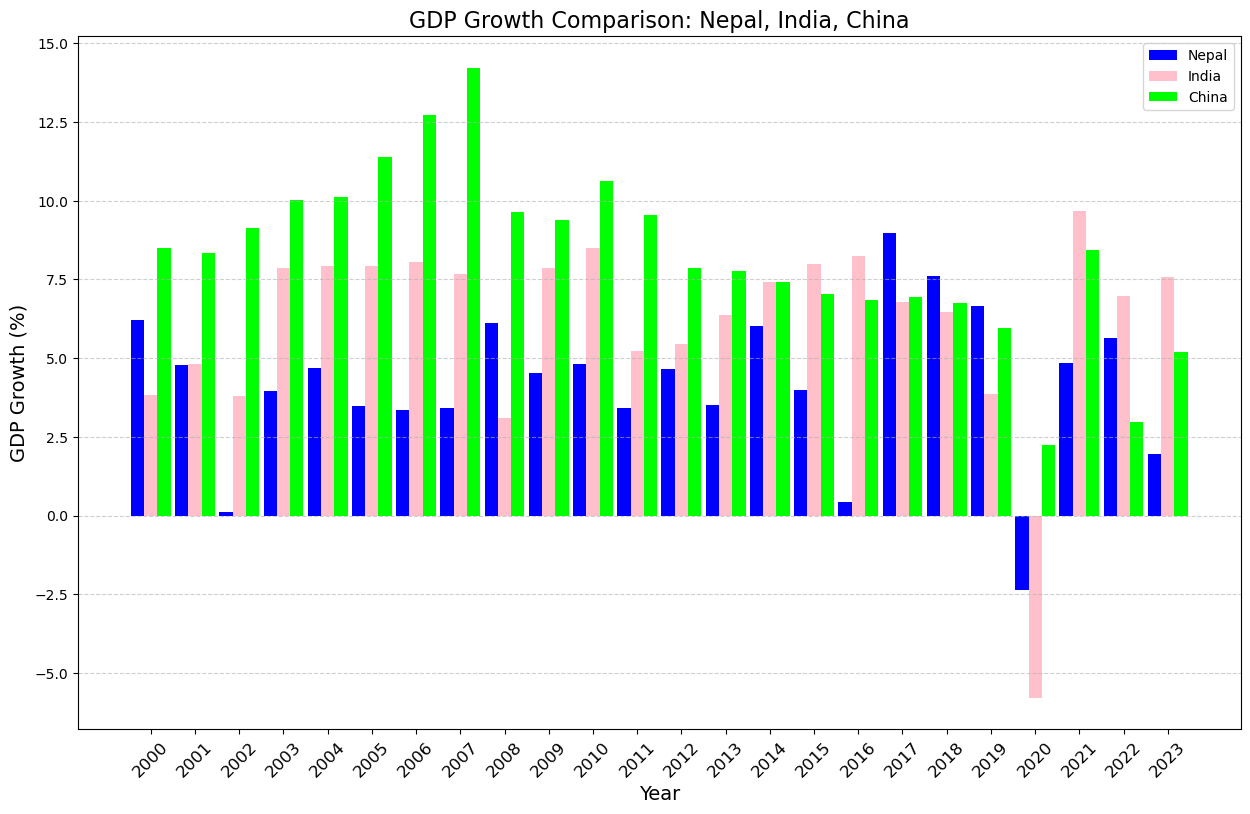

In [30]:
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')

#Set up the figure size 
plt.figure(figsize=(15,9))

# Define the width of the bars
width = 0.3
x = range(len(nep_ind_china_gdp_data['Year']))

#Plotting the bars for Nepal, India, and china
plt.bar([i - width for i in x], nep_ind_china_gdp_data['Nepal'], width=width, label = 'Nepal', color = 'Blue' )
plt.bar(x, nep_ind_china_gdp_data['India'], width=width, label = 'India', color = 'Pink' )
plt.bar([i + width for i in x], nep_ind_china_gdp_data['China'], width=width, label = 'China', color = 'lime')

# Adding titles and labels 
plt.title('GDP Growth Comparison: Nepal, India, China', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('GDP Growth (%)', fontsize = 14)
plt.xticks(x, nep_ind_china_gdp_data['Year'], fontsize = 12, rotation = 45)
plt.legend()

#Adding grids lines for better readability 
plt.grid(axis ='y', linestyle = '--', alpha = 0.6)

#Display the chart 
plt.show()

### b. Line Graph

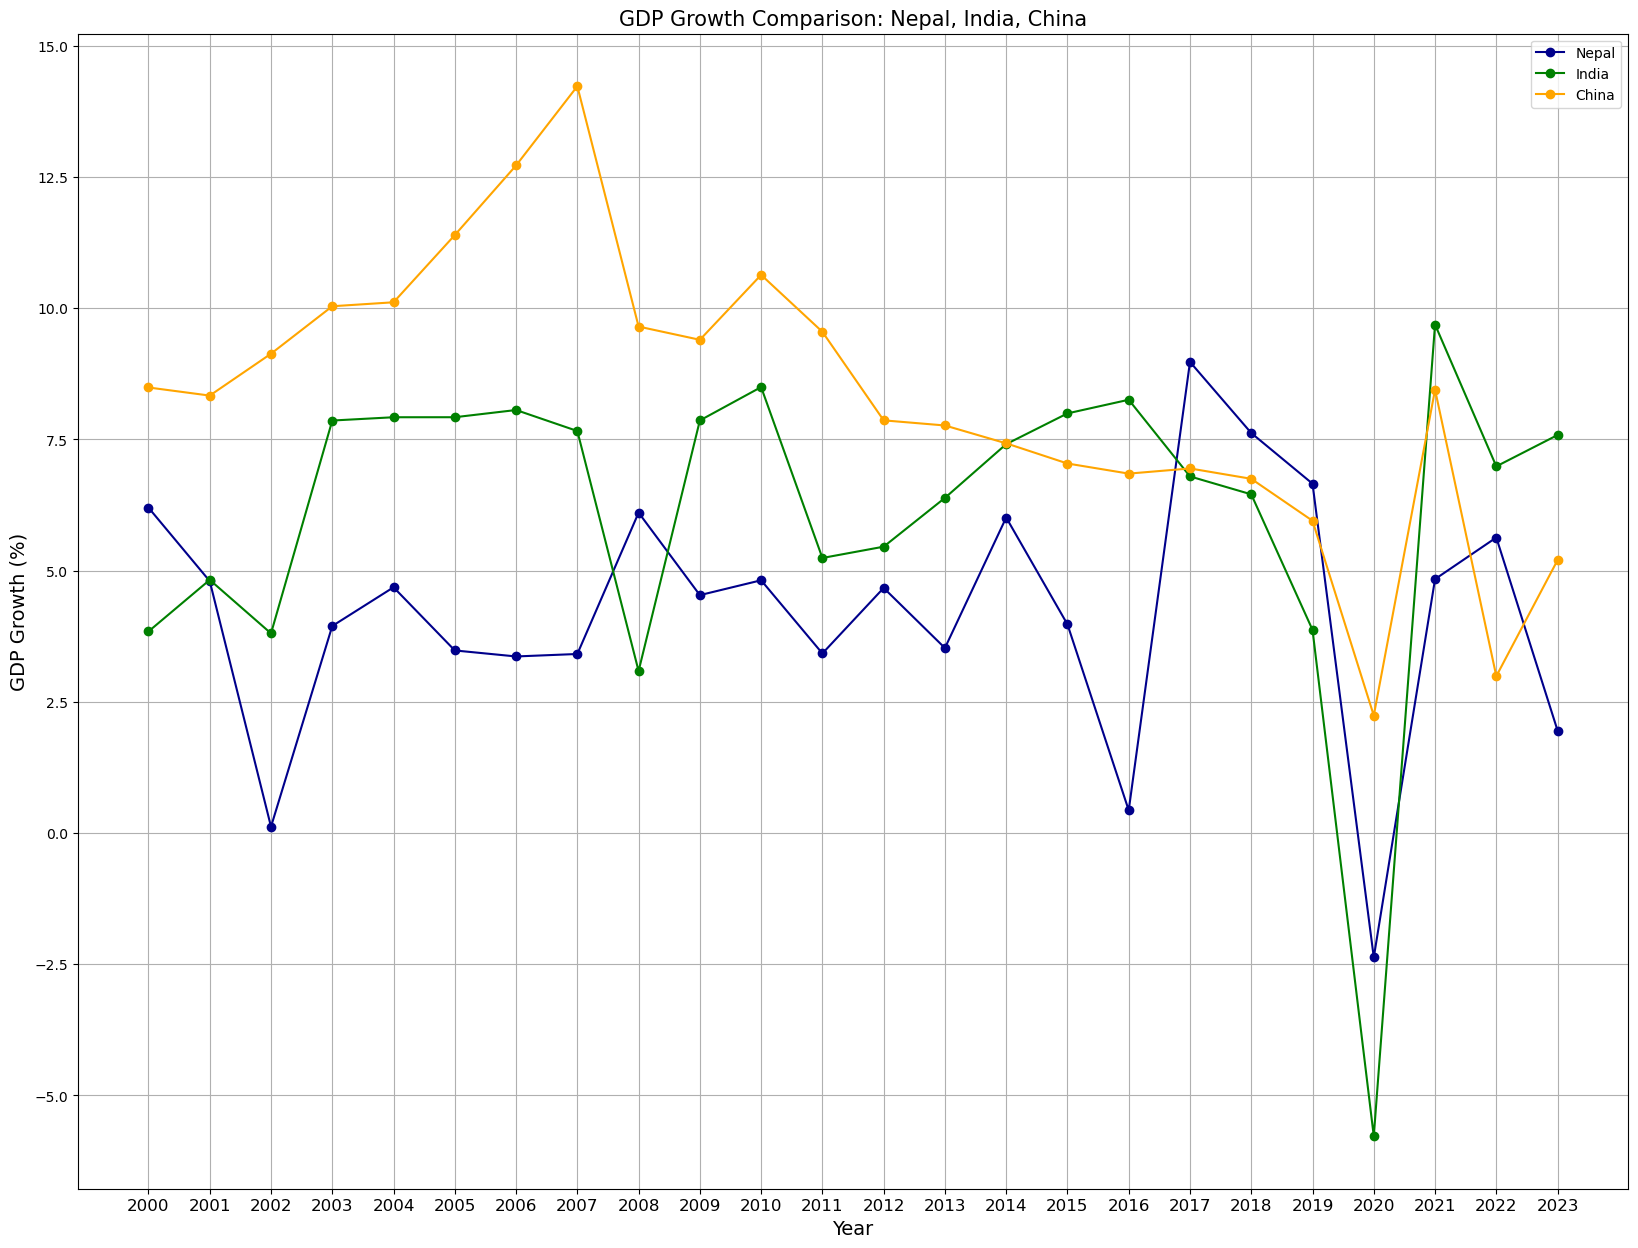

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')

# Set up the figure size
plt.figure(figsize=(20,15))

# Plotting the lines for Nepal, India, and China
plt.plot(nep_ind_china_gdp_data['Year'], nep_ind_china_gdp_data['Nepal'], label='Nepal', color='Darkblue', marker='o')
plt.plot(nep_ind_china_gdp_data['Year'], nep_ind_china_gdp_data['India'], label='India', color='Green', marker='o')
plt.plot(nep_ind_china_gdp_data['Year'], nep_ind_china_gdp_data['China'], label='China', color='Orange', marker='o')

# Adding titles and labels
plt.title('GDP Growth Comparison: Nepal, India, China', fontsize=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth (%)', fontsize=14)
plt.xticks(nep_ind_china_gdp_data['Year'], fontsize=12)

#Show legend
plt.legend()     # shows index

#Show plot
plt.grid(True)
plt.show()

# Visualize Relationship Between Data
* **Scatter Plot:** A scatter plot identifies a possible relationship between changes observed in two
different sets of variables
* **Bubble Chart:** A bubble chart can be used to represent the relationship between x (age), yfincome),
and bubble size (expense)
* **Heat Map:** Heat maps are graphical representations of data that use colors to show the intensity of a
variable or a relationship
* **Density Plot:** A Density Plot visualises the distribution of data ovey? continuous interval or time
period
* **Correlation Matrix:** A correlation matrix is a statistical technique used to evaluste the relationship
between two variables in a data set

### a. Scattered Plot

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


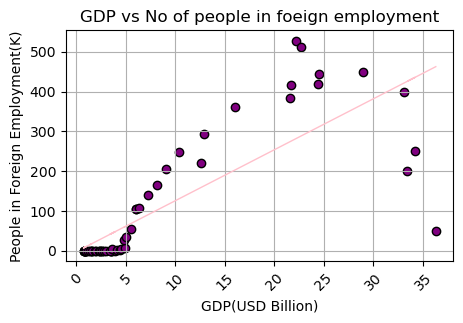

In [ ]:
# Finding no. of people in foreign employment with GDP

from IPython.display import display
import numpy as np

#Create the scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment']=nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n:n/1000)
display(nepal_economy.head())
plt.figure(figsize=(5,3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor='black'
)

#Fit a  linera regression model to the data 

x= nepal_economy['GDP']
y=nepal_economy['no_of_people_in_foreign_employment']
m,c=np.polyfit(x,y,1)    #1 is degree of polynomial y=mx+c is of degree 1

#plot the trend line
plt.plot(x, m * x + c, color='pink', linewidth=1, label='GDP-FE-Trend-Line')

#Add titles and label
plt.xticks(rotation=45)
plt.title('GDP vs No of people in foeign employment')
plt.xlabel('GDP(USD Billion)')
plt.ylabel('People in Foreign Employment(K)')
plt.grid(True)

#Display the plot
plt.show()

### b. Bubble Chart

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


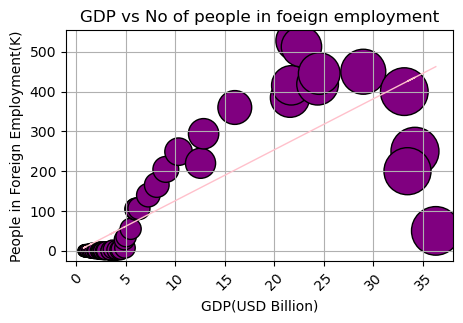

In [ ]:
# Classwork
# x = nepal_econoy['GOP',
# y = nepal_economy['no_of_people_in_foreign_employment']
# bubble_size = nepal_economy('per_capita']

from IPython.display import display
import numpy as np

#Create the scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment']=nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n:n/1000)
display(nepal_economy.head())
plt.figure(figsize=(5,3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor='black',
    s=nepal_economy['per_capita']
)

#Fit a  linera regression model to the data 

x= nepal_economy['GDP']
y=nepal_economy['no_of_people_in_foreign_employment']
m,c=np.polyfit(x,y,1)    #1 is degree of polynomial y=mx+c is of degree 1

#plot the trend line
plt.plot(x, m * x + c, color='pink', linewidth=1, label='GDP-FE-Trend-Line')

#Add titles and label
plt.xticks(rotation=45)
plt.title('GDP vs No of people in foeign employment')
plt.xlabel('GDP(USD Billion)')
plt.ylabel('People in Foreign Employment(K)')
plt.grid(True)

#Display the plot
plt.show()

### c. HeatMap (to display trades)

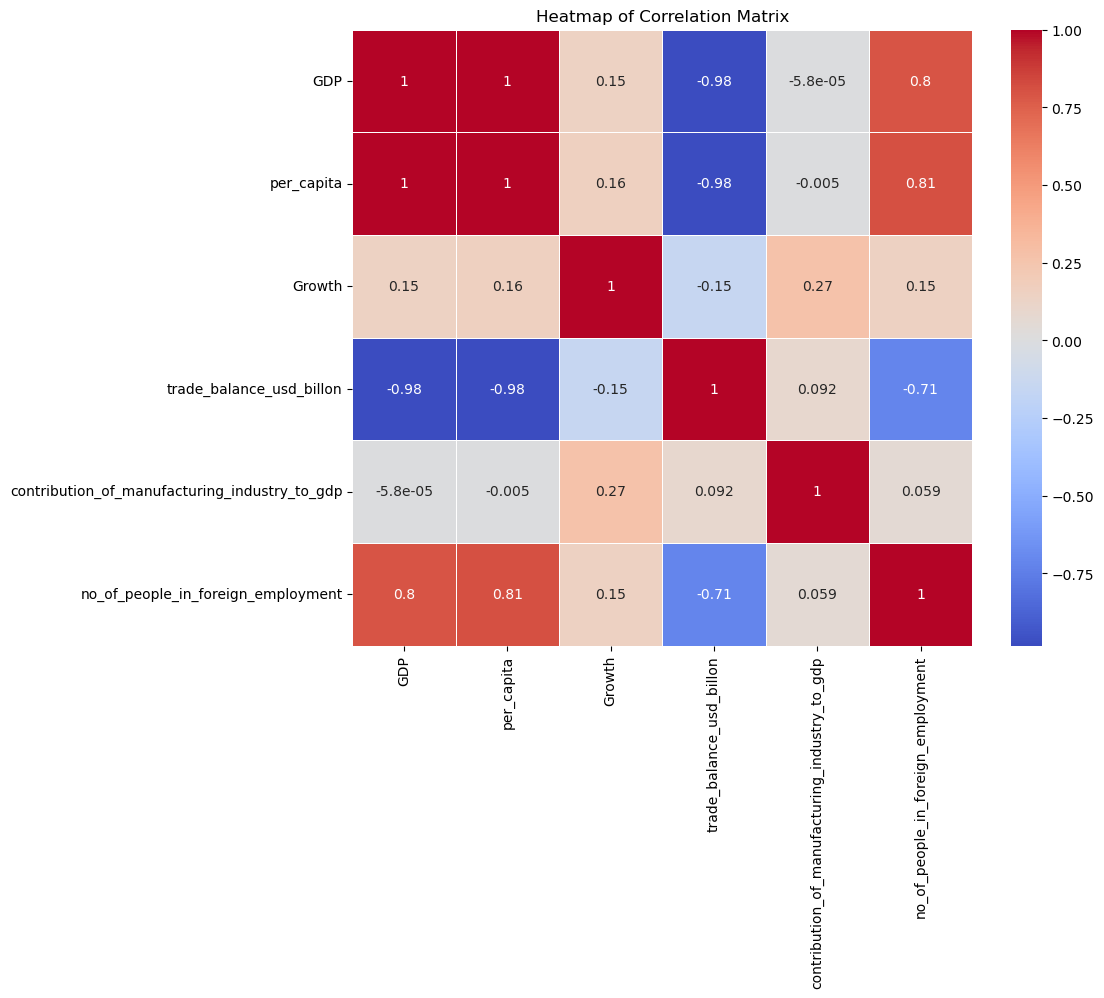

In [25]:
import seaborn as sns
plt.figure(figsize=(10,8))
correlation_matrix = nepal_economy.drop(columns=['Year'],inplace=False).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

### d. Density Plot

### e. Correlation Matrix (as a table)

In [26]:
correlation_matrix = nepal_economy.corr()
correlation_matrix


,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
Year,1.000000,0.845820,0.846708,0.254044,-0.766659,0.475763,0.771020
GDP,0.845820,1.000000,0.998997,0.146186,-0.982487,-0.000058,0.796869
per_capita,0.846708,0.998997,1.000000,0.158333,-0.979142,-0.005014,0.809410
Growth,0.254044,0.146186,0.158333,1.000000,-0.147418,0.265296,0.148406
trade_balance_usd_billon,-0.766659,-0.982487,-0.979142,-0.147418,1.000000,0.091974,-0.712016
contribution_of_manufacturing_industry_to_gdp,0.475763,-0.000058,-0.005014,0.265296,0.091974,1.000000,0.059188
no_of_people_in_foreign_employment,0.771020,0.796869,0.809410,0.148406,-0.712016,0.059188,1.000000


# **Distributions**
* **Histogram:** Histogram is used to describe numecical data which have grouped into frequency
distribution
* **Frequency Polygon:** Frequency Polygon can be constructed simply by joining the upper mid point
of histogram
* **Cumulative Frequency Distrilbution (ogive):** Cumulative frequenoy distribtion faclitages to set hon may observations lie above or below certain values and is also graphicial presentation of frequenoy distribution.
* **Box Plot:** It shows the Five Point summary (Min,Q1, Median, Q3, Max) and outliers


### a. Histogram

[0, 20, 40, 60, 80, 100]


,Marks,no_of_students,mid_points,bins
0,0-20,10,10.0,"(0, 20]"
1,20-40,22,30.0,"(20, 40]"
2,40-60,35,50.0,"(20, 40]"
3,60-80,28,70.0,"(20, 40]"
4,80-100,5,90.0,"(0, 20]"


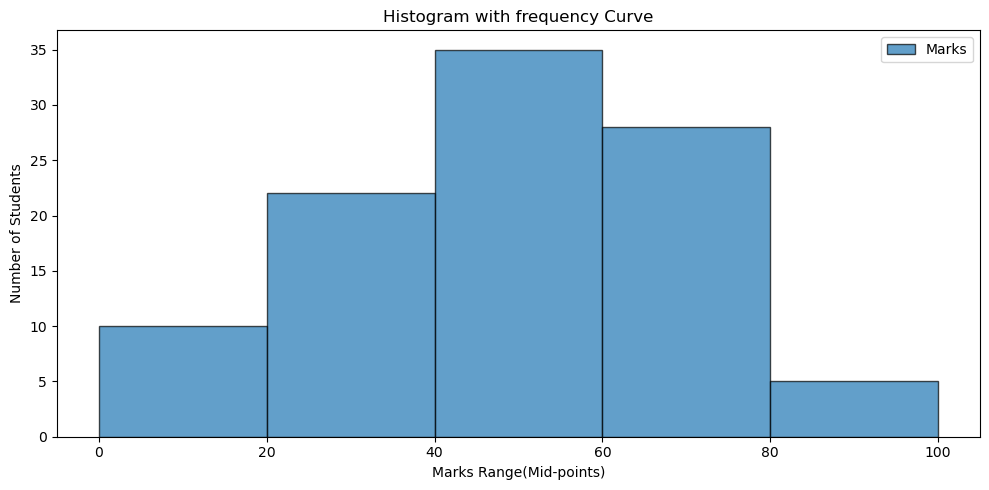

In [30]:
students_data = pd.DataFrame({
    'Marks':['0-20', '20-40', '40-60','60-80', '80-100'],
    'no_of_students': [10,22,35,28,5]
})

students_data['mid_points']= students_data['Marks'].apply(lambda m: (int(m.split('-')[0]) + int(m.split('-')[1])) /2)
lower_bounds = students_data['Marks'].apply(lambda m:int(m.split('-')[0])).min()
upper_bounds = students_data['Marks'].apply(lambda m:int(m.split('-')[1])).max()

bin_edges = list(range(lower_bounds, upper_bounds + 1,20))
students_data['bins'] = pd.cut(x= students_data['no_of_students'], bins=bin_edges)     # Histogram ko edges
print(bin_edges)
display(students_data.head())

plt.figure(figsize=(10,5))

# use mid_points as the x-values for the histogram and the frequency y-values 
plt.hist(students_data['mid_points'], bins=bin_edges, weights=students_data['no_of_students'], edgecolor='black', alpha = 0.7, label='Marks')

# Add labels and title 
plt.xlabel('Marks Range(Mid-points)')
plt.ylabel('Number of Students')
plt.title('Histogram with frequency Curve')

# Display the legend 
plt.legend()
plt.tight_layout()

#SHow the plot 
plt.show()

### b. Frequency Polygon

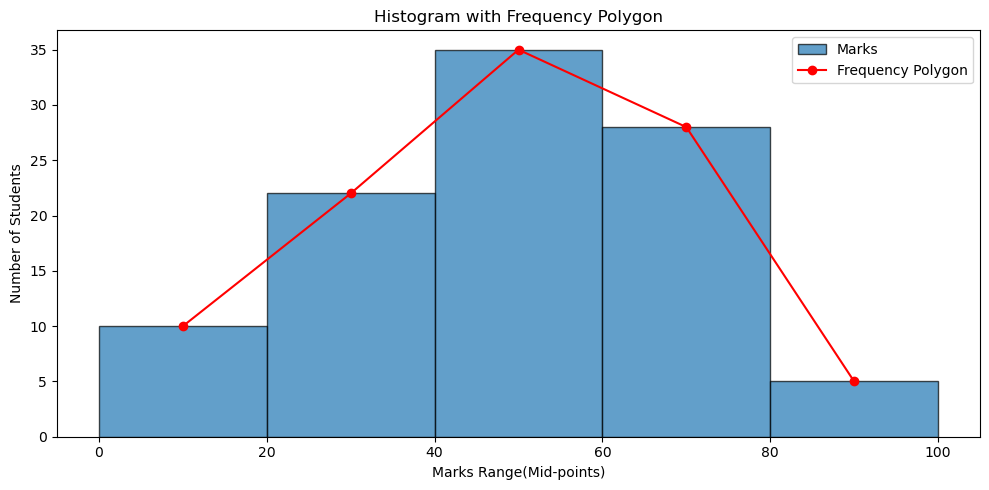

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

students_data = pd.DataFrame({
    'Marks':['0-20', '20-40', '40-60','60-80', '80-100'],
    'no_of_students': [10,22,35,28,5]
})

students_data['mid_points']= students_data['Marks'].apply(lambda m: (int(m.split('-')[0]) + int(m.split('-')[1])) /2)
lower_bounds = students_data['Marks'].apply(lambda m:int(m.split('-')[0])).min()
upper_bounds = students_data['Marks'].apply(lambda m:int(m.split('-')[1])).max()

bin_edges = list(range(lower_bounds, upper_bounds + 1,20))
students_data['bins'] = pd.cut(x= students_data['no_of_students'], bins=bin_edges)     # Histogram ko edges

# Plot the histogram
plt.figure(figsize=(10,5))

# Histogram
plt.hist(students_data['mid_points'], bins=bin_edges, weights=students_data['no_of_students'], edgecolor='black', alpha=0.7, label='Marks')

# Frequency Polygon (using mid_points and no_of_students)
plt.plot(students_data['mid_points'], students_data['no_of_students'], marker='o', linestyle='-', color='red', label='Frequency Polygon')

# Add labels and title 
plt.xlabel('Marks Range(Mid-points)')
plt.ylabel('Number of Students')
plt.title('Histogram with Frequency Polygon')

# Display the legend 
plt.legend()
plt.tight_layout()

# Show the plot 
plt.show()


### c. Cumulative Frequency

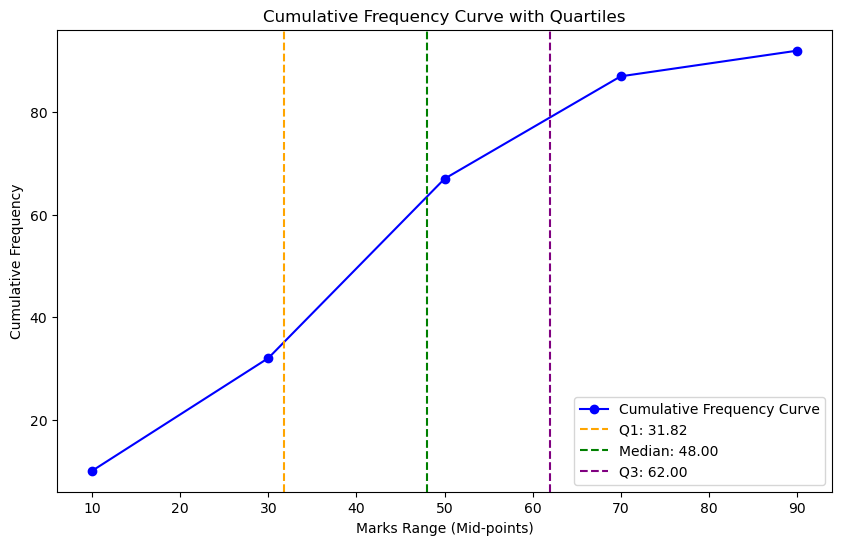

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Define the grouped data
students_data = pd.DataFrame({'Marks': ['0-20', '20-40', '40-60', '60-80', '80-100'], 'no_of_students': [10, 22, 35, 20, 5]})

# Calculate midpoints
students_data['mid_points'] = students_data['Marks'].apply(lambda m: (int(m.split('-')[0]) + int(m.split('-')[1])) / 2)

# Cumulative Frequency
students_data['cumulative_freq'] = students_data['no_of_students'].cumsum()

# Calculate the total number of students
total_students = students_data['no_of_students'].sum()

# Function to calculate quartile using interpolation
def calculate_quartile(position, students_data):
    for index, row in students_data.iterrows():
        if row['cumulative_freq'] >= position:
           
            # Find the class interval where the quartile lies
            L = int(row['Marks'].split('-')[0])                                        # Lower boundary of the class
            cf = students_data.loc[index - 1, 'cumulative_freq'] if index > 0 else 0
            f = row['no_of_students']                                     # Frequency of the current class
            h = 20                                       # Class width
            return L + ((position - cf) / f) * h                     # L + ((position - cf) / f) * h
    return None

# Calculate the positions of Q1, Median (Q2), and Q3
Q1_position = 0.25 * total_students
Q2_position = 0.50 * total_students
Q3_position = 0.75 * total_students

# Calculate Q1, Median, and Q3 using interpolation
Q1 = calculate_quartile(Q1_position, students_data)
Median = calculate_quartile(Q2_position, students_data)
Q3 = calculate_quartile(Q3_position, students_data)

# Plotting
plt.figure(figsize=(10, 6))

# Plot cumulative frequency curve
plt.plot(students_data['mid_points'], students_data['cumulative_freq'], marker='o', color='blue', linestyle='-', label='Cumulative Frequency Curve')

# Add quartiles as vertical lines on the plot
plt.axvline(Q1, color='orange', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(Median, color='green', linestyle='--', label=f'Median: {Median:.2f}')
plt.axvline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}')

# Add labels and title
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Curve with Quartiles')

# Display the legend
plt.legend()

# Show the plot
plt.show()

* Pie-chart
* Stacked Bar Graph

### a. Pie-chart

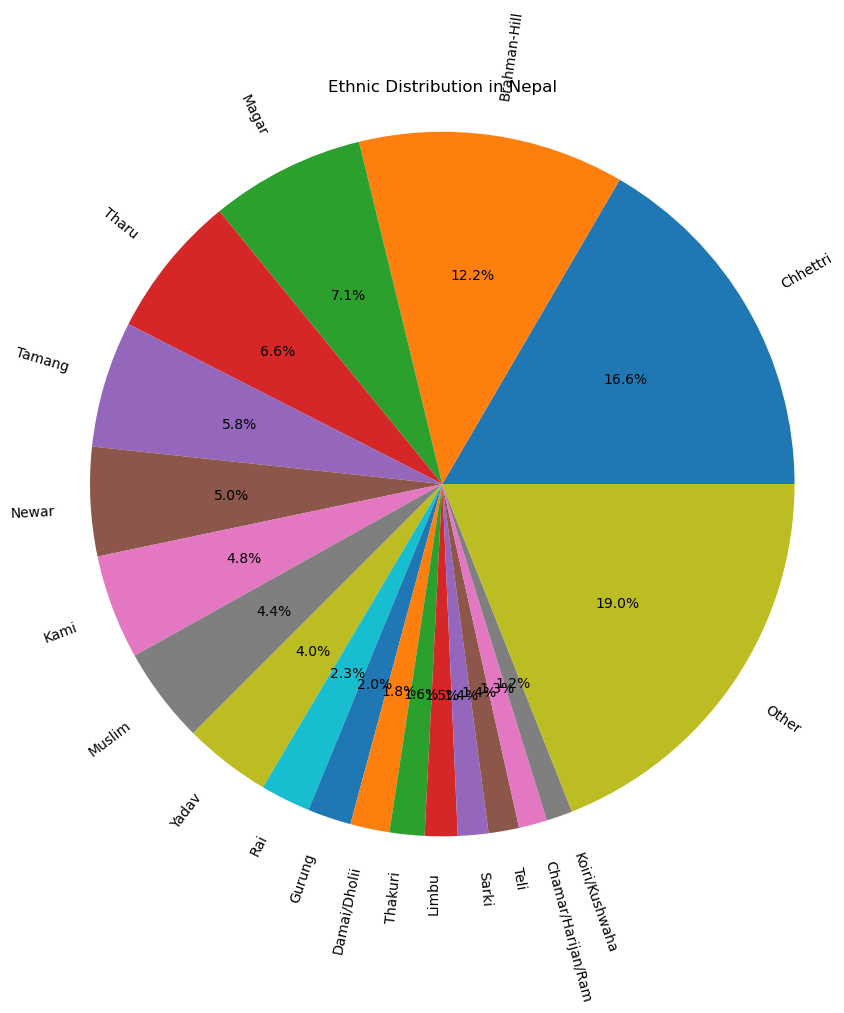

In [21]:
import matplotlib.pyplot as plt
import json
with open('data/nepal-population-ethinic-group.json','r')as file:
    ethnic_dist=json.load(file)

#Dara Preperation
labels=ethnic_dist.keys()
sizes=ethnic_dist.values()

#Create pie chart 
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=0, rotatelabels=45)
plt.title('Ethnic Distribution in Nepal')
plt.axis('equal')

#Display the pie chart
plt.show()

### b. Stacked Bar Graph

## **Numpy**


### **Introduction**
NumPy stands for Numerical Python, is an open-source Python library that provides support for large,
multi-dimensional arrays and matrices.

It also have a collection of high-level mathematical functions to operate on arrays.



### **Features**
* A powerful N-dimensional array object
* Sophisticated (broadcasting) functinns


### **NumPy Array Creation**
##### From Python List, Tuple

In [ ]:
import numpy as np

np_array = np.array([2,2,3,4,5,6])          #From list
print(np_array)
np_array_tuple = np.array((1,3,4,5))          #from tuple
print(np_array_tuple)
print(type(np_array))
print(np_array.shape)    # count of numbers
print(np_array.dtype)    # int = memory ma vako
print (2**32)

[2 2 3 4 5 6]
[1 3 4 5]
<class 'numpy.ndarray'>
(6,)
int32
4294967296


### Create array with default values
* Create an array filled with zeros np.zeros ( (2,2))
* Create an array filled with ones np.ones ( (2,2))
* Create an array filled with a specific value np.full ( (2,2),3)

In [ ]:
# Creating Matrix

zeros_array = np.zeros((2,2))              # create (n=2,m=2) array filled with zeros 
print (zeros_array)
ones_array = np.ones ((3,4))            #create (n=3,m=4) array filled with ones 
print (ones_array)
fill_array = np. full ((2,2),5)
print (fill_array)
print (zeros_array.dtype)

[[0. 0.]
 [0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[5 5]
 [5 5]]
float64


## Creating Arrays with Ranges of Values
* np.arange(0,25,1) # [0,5,10,15,20] similar to range
* np.linespace(0,100,1000)  create evenly spaced values(1000) between start (0)-end(100)

In [29]:
np_arange = np.arange(0,25,1) # similar to range (8,25)
print(np_arange)
np_line_space = np.linspace(0,100,11) # ceate evenly space 100 points from 0-100
print(np_line_space)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


# Identity, Diagonal Matrices
* np.eye(3,3)
* np.diag([1,2,3])

In [30]:
identical_array = np.eye(3,3) # identity array
print (identical_array)
diagonal_array = np.diag([1,2,3]) # diagonal array
print (diagonal_array)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]


# Random Arrays
* np.random.rand([3,3]) create 3 x 3 array filled with random numbers
* np.random.randint(1,100,(3,3))create 3 x 3 array of random numbers, where numbers are in between 1-100
* np.random.choice([1,2,3,4,5,6,10],size=(3,3)) create 3x3 aray of random number, where numbers are from given list
* np.random.normal(mu,sig-a,1800)Create random array of elements 100 with mu-population mean and sigma-population standard deviation

[[0.60499349 0.83874095 0.58182239]
 [0.4548993  0.42650526 0.83581717]
 [0.0093582  0.45655726 0.58882461]]
[[44 53 25]
 [17 65 64]
 [68 79  8]]
10


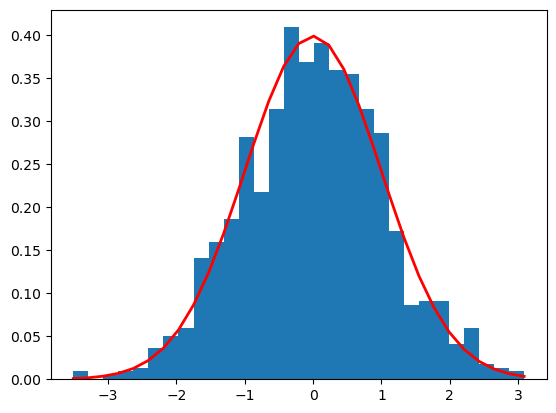

In [7]:
import numpy as np
import matplotlib.pyplot as plt

random_array = np.random.rand(3,3)
print(random_array)

random_array = np.random.randint(1,100,(3,3))
print(random_array)

random_array = np.random.choice([1,2,3,4,5,6,10])
print(random_array)

mu,sigma = 0,1
random_array = np.random.normal(mu,sigma,1000), 
count, bins, ignored = plt.hist(random_array, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()